In [243]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import datetime as dt
import plotly as plotly
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [244]:
#Read in the CSV set
main_data = pd.read_csv('googleplaystore.csv')
main_data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [245]:
#Evaluate count of ratings
main_data.count()

Rating             9366
App               10840
Category          10840
Reviews           10840
Size              10840
Installs          10840
Type              10839
Price             10840
Content Rating    10840
Genres            10840
Last Updated      10840
Current Ver       10832
Android Ver       10838
dtype: int64

In [246]:
#drop rating with zero value
updated_df = main_data.dropna()

#Evaluate # of ratings 
updated_df.count()


Rating            9360
App               9360
Category          9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [247]:
# Cleaned data to show columns
cleaned_df = updated_df[['Rating','App','Category','Reviews','Type','Installs','Last Updated']]
cleaned_df

,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,"10,000+",07-Jan-18
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,"500,000+",15-Jan-18
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,"5,000,000+",01-Aug-18
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,"50,000,000+",08-Jun-18
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,"100,000+",20-Jun-18
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500+,18-Jun-17
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,"5,000+",25-Jul-17
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100+,06-Jul-18
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,"1,000+",19-Jan-15


In [248]:
#looking for the updated unique values
n = cleaned_df.nunique(axis=0)
n

Rating            39
App             8190
Category          33
Reviews         5990
Type               2
Installs          19
Last Updated    1299
dtype: int64

In [249]:
#State the number of rows and columns
cleaned_df.shape

(9360, 7)

In [250]:
#Confirm that we found the unique values properly. We used cleaned_df moving forward.
cleaned_df = cleaned_df.drop_duplicates(subset="App")
cleaned_df

,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,"10,000+",07-Jan-18
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,"500,000+",15-Jan-18
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,"5,000,000+",01-Aug-18
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,"50,000,000+",08-Jun-18
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,"100,000+",20-Jun-18
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500+,18-Jun-17
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,"5,000+",25-Jul-17
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100+,06-Jul-18
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,"1,000+",19-Jan-15


In [251]:
#Convert Install to numberic, removing the +        
newInstalls = []
for row in cleaned_df.Installs:
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
cleaned_df.Installs = newInstalls
cleaned_df.Installs.head()

C:\Users\afloy\anaconda3\envs\pydata\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [252]:
# check the updated installs column
cleaned_df.Installs


0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10833         500.0
10835        5000.0
10836         100.0
10838        1000.0
10839    10000000.0
Name: Installs, Length: 8190, dtype: float64

In [253]:
#Processing the category column
catval_df = cleaned_df['Category'].value_counts(dropna=False)
catval_df.index

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'PRODUCTIVITY',
       'PERSONALIZATION', 'MEDICAL', 'BUSINESS', 'PHOTOGRAPHY', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
       'DATING', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'],
      dtype='object')

In [254]:
#Number of apps per category
catval_df

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [256]:
cleaned_df.dtypes

Rating          float64
App              object
Category         object
Reviews           int64
Type             object
Installs        float64
Last Updated     object
dtype: object

In [281]:
#Convert Last updated to datetime

updated_df['Last Updated'] = pd.to_datetime(updated_df['Last Updated'])
updated_df


<ipython-input-281-56dc335e2bdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['Last Updated'] = pd.to_datetime(updated_df['Last Updated'])


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1,4.1 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


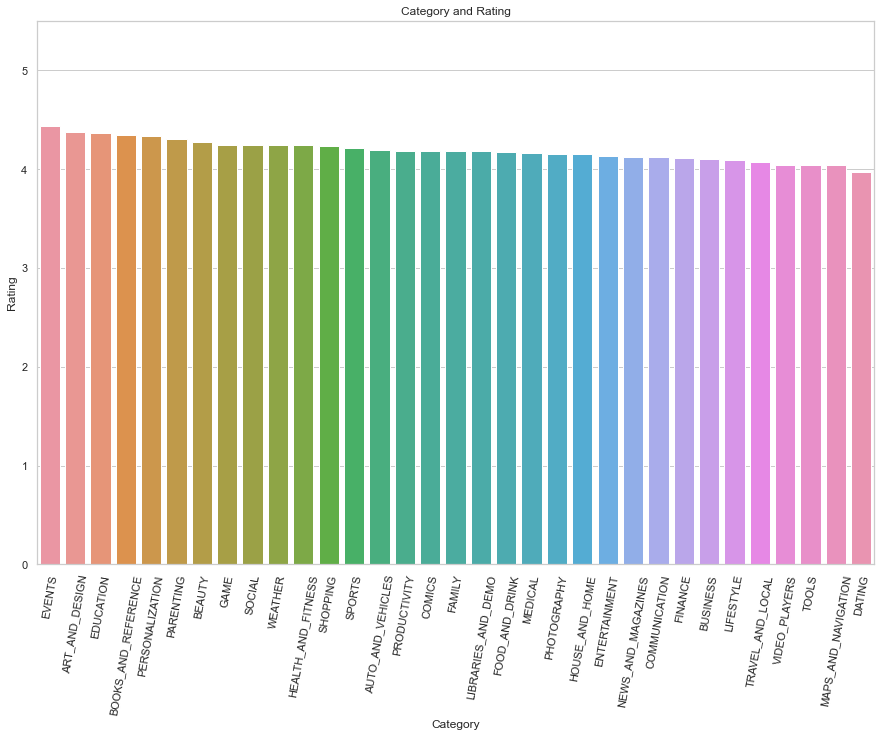

In [287]:
#bar chart original
category_list = list(cleaned_df['Category'].unique())
category_Rating = []
for i in category_list:
    x = cleaned_df[cleaned_df['Category'] == i]
    if(len(x)!=0):
        Rating = sum(x.Rating)/len(x)
        category_Rating.append(Rating)
    else:
        Rating = sum(x.Category)
        category_Rating.append(Rating)
        
#sorting
data_category_Rating= pd.DataFrame({'Category': category_list,'Rating':category_Rating})
new_index = (data_category_Rating['Rating'].sort_values(ascending=False)).index.values
sorted_data =data_category_Rating.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['Category'], y=sorted_data['Rating'])
plt.xticks(rotation=80)
plt.ylim(0,5.5)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category and Rating")
plt.show()

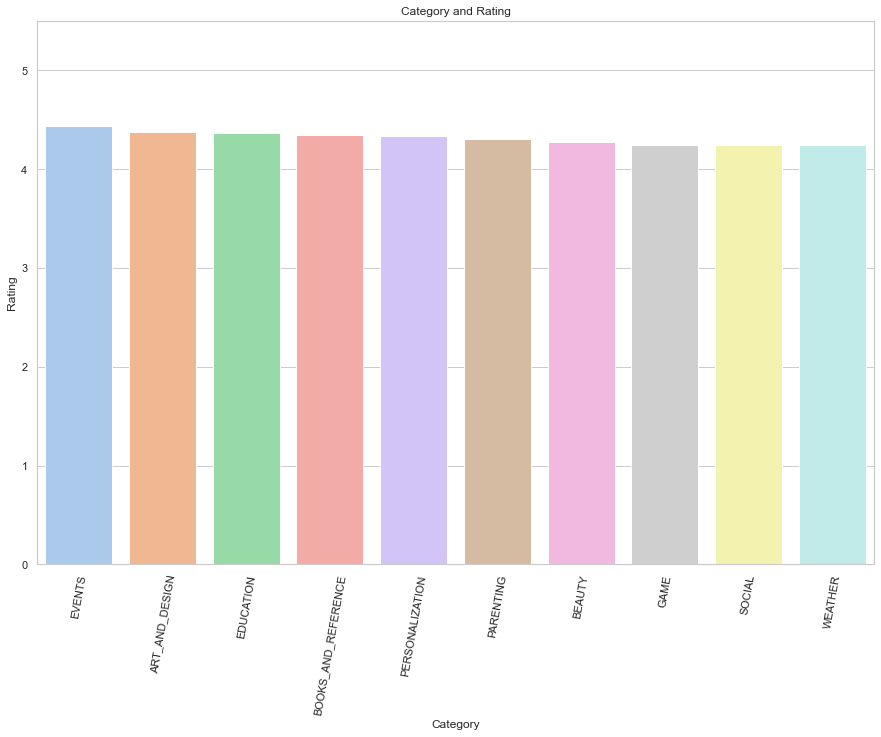

In [284]:
#bar chart top 10
category_list = list(cleaned_df['Category'].unique())
category_Rating = []
for i in category_list:
    x = cleaned_df[cleaned_df['Category'] == i]
    if(len(x)!=0):
        Rating = sum(x.Rating)/len(x)
        category_Rating.append(Rating)
    else:
        Rating = sum(x.Category)
        category_Rating.append(Rating)
        
#sorting
data_category_Rating= pd.DataFrame({'Category': category_list,'Rating':category_Rating})
new_index = (data_category_Rating['Rating'].sort_values(ascending=False)[:10]).index.values
sorted_data =data_category_Rating.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['Category'], y=sorted_data['Rating'])
plt.xticks(rotation=80)
plt.ylim(0,5.5)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category and Rating")
plt.show()


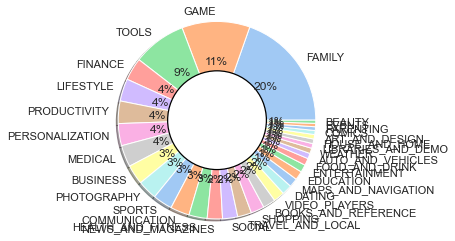

In [285]:
# PIE CHART FOR ALL 33 CATEGORIES

#SHOWING THIS FOR FUN, DEMONSTRATING HOW CHAOTIC THIS WAS!

# The slices will be ordered and plotted counter-clockwise.
labels = catval_df.index.values
value= catval_df.values


plt.pie(value, labels=labels,
        autopct='%1.0f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  








In [286]:
#Reduce the number of category to the top ten by number of apps.
topten_df = cleaned_df['Category'].value_counts(dropna=False).sort_values(ascending =False)[:10]
topten_df


FAMILY             1607
GAME                912
TOOLS               717
FINANCE             302
LIFESTYLE           301
PRODUCTIVITY        301
PERSONALIZATION     296
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

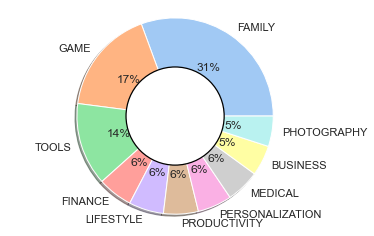

In [264]:
# TOP TEN

#The slices will be ordered and plotted counter-clockwise.
labels = topten_df.index.values
value= topten_df.values


plt.pie(value, labels=labels,
        autopct='%1.0f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  


In [288]:
#Find the top ten Ratings by their frequency. We were curious what the most common scores were to try to
#make more sense of peoples' proclivity to rank apps unrealistically highly or lowly. 
toprate_df = cleaned_df['Rating'].value_counts(dropna=False).sort_values(ascending =False)[:5]
toprate_df = cleaned_df['Rating'].value_counts(dropna=False).sort_values(ascending =False)[:5]
toprate_df

4.3    897
4.4    894
4.5    847
4.2    809
4.6    683
4.1    620
4.0    512
4.7    442
3.9    359
3.8    286
5.0    271
Name: Rating, dtype: int64

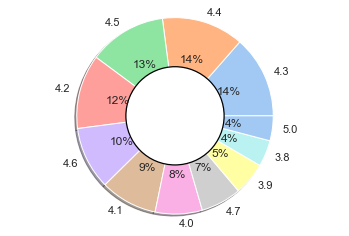

In [265]:
# TOP TEN

#The slices will be ordered and plotted counter-clockwise.
labels = toprate_df.index.values
value= toprate_df.values


plt.pie(value, labels=labels,
        autopct='%1.0f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

#We found that people do not typically rate apps very lowly, or highly. The upper and lower bounds 
#of 5 and 0 were relatively uncommon, as we expected. 

In [267]:
# # Updated versions vs Ratings 
upver_df =cleaned_df[['Last Updated','Rating']]
upver_df

,Last Updated,Rating
0,2018-01-07,4.1
1,2018-01-15,3.9
2,2018-08-01,4.7
3,2018-06-08,4.5
4,2018-06-20,4.3
...,...,...
10833,2017-06-18,4.0
10835,2017-07-25,4.5
10836,2018-07-06,5.0
10838,2015-01-19,4.5


In [268]:
cleaned_df.describe()

,Rating,Reviews,Installs
count,8190.000000,8.190000e+03,8.190000e+03
mean,4.173321,2.554354e+05,9.171613e+06
std,0.536691,1.986309e+06,5.827170e+07
min,1.000000,1.000000e+00,1.000000e+00
25%,4.000000,1.260000e+02,1.000000e+04
50%,4.300000,3.009500e+03,1.000000e+05
75%,4.500000,4.391425e+04,1.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


In [272]:
cleaned_df

,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,10000.0,2018-01-07
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,500000.0,2018-01-15
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,5000000.0,2018-08-01
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,50000000.0,2018-06-08
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,100000.0,2018-06-20
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500.0,2017-06-18
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,5000.0,2017-07-25
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100.0,2018-07-06
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,1000.0,2015-01-19


In [269]:
cleaned_df.corr()

,Rating,Reviews,Installs
Rating,1.000000,0.055076,0.040131
Reviews,0.055076,1.000000,0.624050
Installs,0.040131,0.624050,1.000000


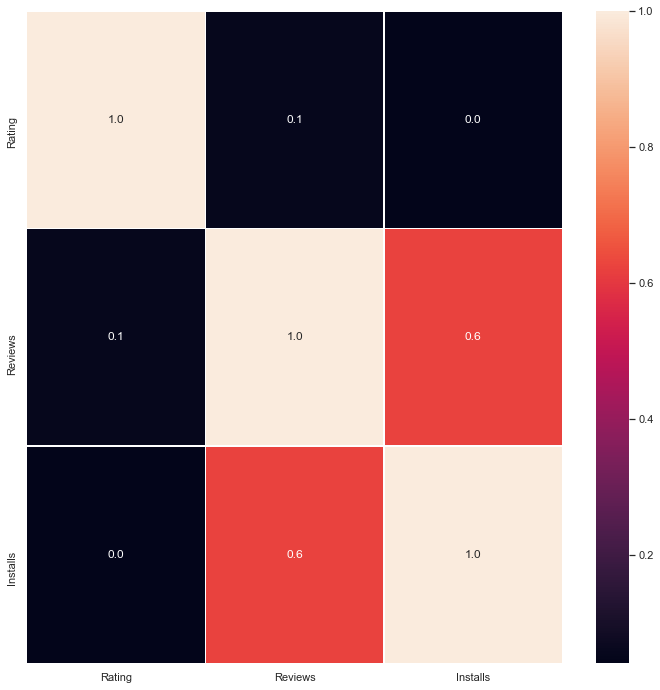

In [274]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cleaned_df.corr(), annot=True, linewidths=.5, fmt= '.001f',ax=ax)
plt.show()

ZeroDivisionError: division by zero

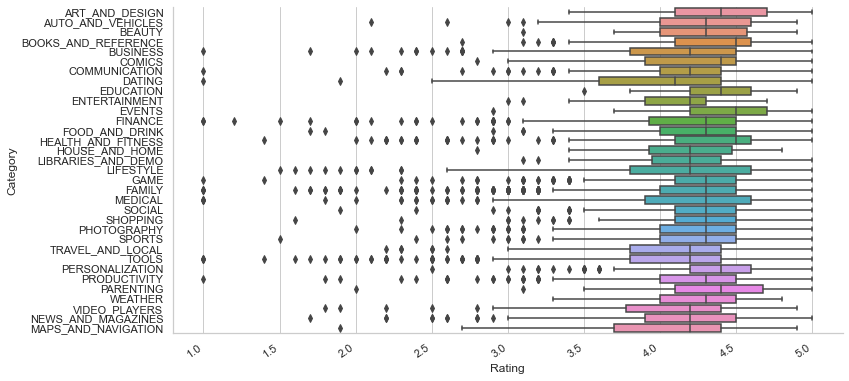

In [275]:
#Create Boxplots to help show mean, standard deviation, and outliers.
fig, ax = plt.subplots(1, figsize =(12,6))

sns.set(style="whitegrid", palette="pastel",color_codes=True)

sns.boxplot(x="Rating",y="Category", data=cleaned_df)
sns.despine()

plt.xticks(rotation =35, ha='right')
plt.yticks(np.arange(0,12,0))
plt.show()

In [277]:
count_df = catval_df.count

ZeroDivisionError: division by zero

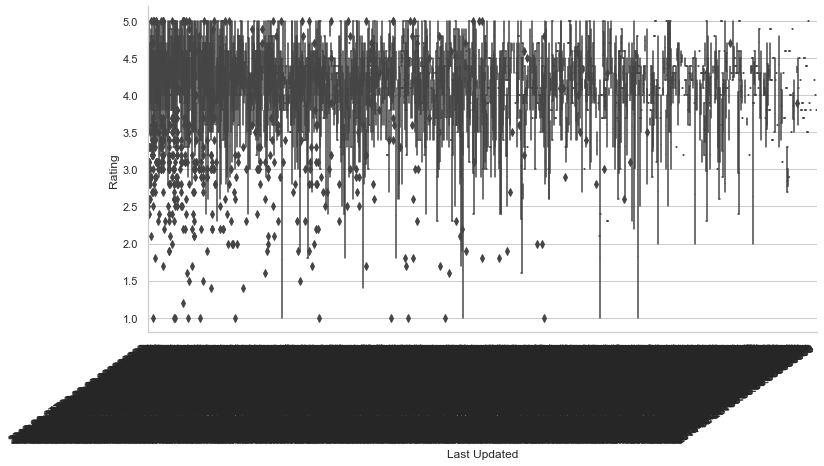

In [280]:
#Compare ratings with the time of the last update
fig, ax = plt.subplots(1, figsize =(12,6))
sns.set(style="whitegrid", palette="pastel",color_codes=True)
sns.boxplot(x="Last Updated",y="Rating", data=cleaned_df)
sns.despine()
plt.xticks(rotation =35, ha='right')
plt.yticks(np.arange(0,12,0))
plt.show()

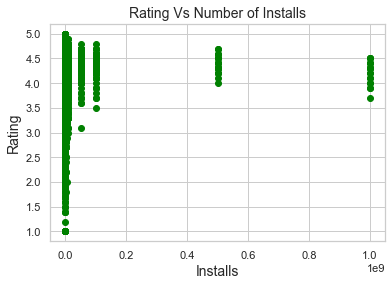

In [221]:
#Compare Rating and Number of Installs
install_df = pd.DataFrame(cleaned_df,columns =['Installs','Rating'])
plt.scatter(install_df['Installs'], install_df['Rating'], color='green', marker='o')
plt.title('Rating Vs Number of Installs', fontsize=14)
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True)
plt.show()

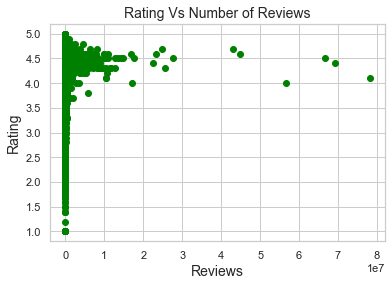

In [222]:
#Compare Rating and Number of Reviews
reviews_df = pd.DataFrame(cleaned_df,columns =['Reviews','Rating'])
plt.scatter(reviews_df['Reviews'], install_df['Rating'], color='green', marker='o')
plt.title('Rating Vs Number of Reviews', fontsize=14)
plt.xlabel('Reviews', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True)
plt.show()